In [11]:
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

celeba_data_path = '../celebA'

img_folder = os.path.join(celeba_data_path, 'img_align_celeba')





In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np


In [30]:
IMG_SIZE = (160, 160)


In [31]:
# Load CelebA images and labels using metadata from CSV files
def load_celeba_data(data_path, limit_image_name=None):
    # Load attribute labels from the 'list_attr_celeba.csv' file
    attr_file_path = os.path.join(data_path, 'list_attr_celeba.csv')
    df_attr = pd.read_csv(attr_file_path)
    
    # Filter relevant columns (image_id and attribute labels)
    df_attr = df_attr[['image_id', 'Smiling']]  # Change 'Smiling' to the attribute you're interested in
    
    # Load image filenames
    img_filenames = df_attr['image_id'].values

    images = []
    labels = []

    for img_filename in img_filenames:
        img_path = os.path.join(img_folder, img_filename)
        
        # Check if the current image filename exceeds the limit
        if limit_image_name is not None and img_filename > limit_image_name:
            break

        label = df_attr[df_attr['image_id'] == img_filename]['Smiling'].values[0]

        # Resize images to the same size used in your LFW dataset
        img = transform.resize(io.imread(img_path), IMG_SIZE)

        images.append(img)
        labels.append(label)

    return np.array(images), np.array(labels)

In [56]:
import pandas as pd

# Load CelebA data
X_celeb, y_celeb = load_celeba_data(celeba_data_path,limit_image_name='000150.jpg')

# Normalize pixel values to be between 0 and 1
X_celeb = X_celeb / 255.0

# Perform label encoding
label_encoder_celeb = LabelEncoder()
y_celeb_encoded = label_encoder_celeb.fit_transform(y_celeb)

# Split the data into training and testing sets
X_celeb_train, X_celeb_test, y_celeb_train, y_celeb_test = train_test_split(
    X_celeb, y_celeb_encoded, test_size=0.2, random_state=42
)

# Print shapes and unique labels for verification
print("X_celeb shape:", X_celeb.shape)
print("y_celeb shape:", y_celeb_encoded.shape)
print("Number of unique labels in CelebA:", len(np.unique(y_celeb_encoded)))

X_celeb shape: (150, 160, 160, 3)
y_celeb shape: (150,)
Number of unique labels in CelebA: 2


In [57]:
print("X_celeb_train shape:", X_celeb_train.shape)
print("X_celeb_test shape:", X_celeb_test.shape)


X_celeb_train shape: (120, 160, 160, 3)
X_celeb_test shape: (30, 160, 160, 3)


In [58]:
from tensorflow.keras import models
from tensorflow.keras import layers

num_classes_celeb = len(np.unique(y_celeb_encoded))

model_for_transfer_learning = models.load_model('../aug_training_model.h5')
model_for_transfer_learning.pop()  # Remove the last layer
model_for_transfer_learning.add(layers.Dense(num_classes_celeb, activation='softmax'))

In [37]:
model_for_transfer_learning.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [38]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [39]:
history_transfer_learning = model_for_transfer_learning.fit(
    datagen.flow(X_celeb_train, y_celeb_train, batch_size=32),
    validation_data=(X_celeb_test, y_celeb_test),
    epochs=10
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sequential_9/conv2d_27/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\Rj\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Rj\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Rj\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\Rj\AppData\Local\Temp\ipykernel_20020\2219628698.py", line 1, in <module>

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\keras\src\backend.py", line 5395, in relu

output depth must be evenly divisible by number of groups: 64 vs 3
	 [[{{node sequential_9/conv2d_27/Relu}}]] [Op:__inference_train_function_4663]

In [40]:
import tensorflow_hub as hub


In [41]:
mobilenet_v2_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"


In [45]:
mobilenet_v2 = hub.KerasLayer(mobilenet_v2_url, input_shape=(224, 224, 3))


In [59]:
# Resize input images to match the expected input shape of MobileNetV2
X_celeb_train_resized = tf.image.resize(X_celeb_train, (224, 224))
X_celeb_test_resized = tf.image.resize(X_celeb_test, (224, 224))

In [60]:
mobilenet_v2.trainable = False


In [61]:
label_encoder_celeb = LabelEncoder()
y_celeb_train_encoded = label_encoder_celeb.fit_transform(y_celeb_train)
y_celeb_test_encoded = label_encoder_celeb.transform(y_celeb_test)

In [62]:
model_celeb = models.Sequential([
    mobilenet_v2,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

In [63]:
model_celeb.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [64]:
history_transfer_learning = model_celeb.fit(
    X_celeb_train_resized, y_celeb_train_encoded,
    validation_data=(X_celeb_test_resized, y_celeb_test_encoded),
    epochs=10, batch_size=32
)

Epoch 1/10
4/4 [==============================] - 3s 425ms/step - loss: 1.6122 - accuracy: 0.4083 - val_loss: 1.2332 - val_accuracy: 0.4667
Epoch 2/10
4/4 [==============================] - 1s 236ms/step - loss: 1.1617 - accuracy: 0.5250 - val_loss: 0.7536 - val_accuracy: 0.4667
Epoch 3/10
4/4 [==============================] - 1s 232ms/step - loss: 0.8354 - accuracy: 0.5083 - val_loss: 0.8690 - val_accuracy: 0.5333
Epoch 4/10
4/4 [==============================] - 1s 230ms/step - loss: 0.7591 - accuracy: 0.5250 - val_loss: 0.9394 - val_accuracy: 0.4667
Epoch 5/10
4/4 [==============================] - 1s 233ms/step - loss: 0.8577 - accuracy: 0.5250 - val_loss: 0.6975 - val_accuracy: 0.4667
Epoch 6/10
4/4 [==============================] - 1s 232ms/step - loss: 0.7721 - accuracy: 0.4917 - val_loss: 0.7234 - val_accuracy: 0.5333
Epoch 7/10
4/4 [==============================] - 1s 224ms/step - loss: 0.6928 - accuracy: 0.5250 - val_loss: 0.8199 - val_accuracy: 0.4667
Epoch 8/10
4/4 [====

In [65]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_celeb.evaluate(X_celeb_test_resized, y_celeb_test_encoded)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the test loss
print(f'Test Loss: {test_loss:.4f}')


1/1 [==============================] - 0s 185ms/step - loss: 0.7911 - accuracy: 0.4667
Test Accuracy: 46.67%
Test Loss: 0.7911


1/1 [==============================] - 1s 721ms/step


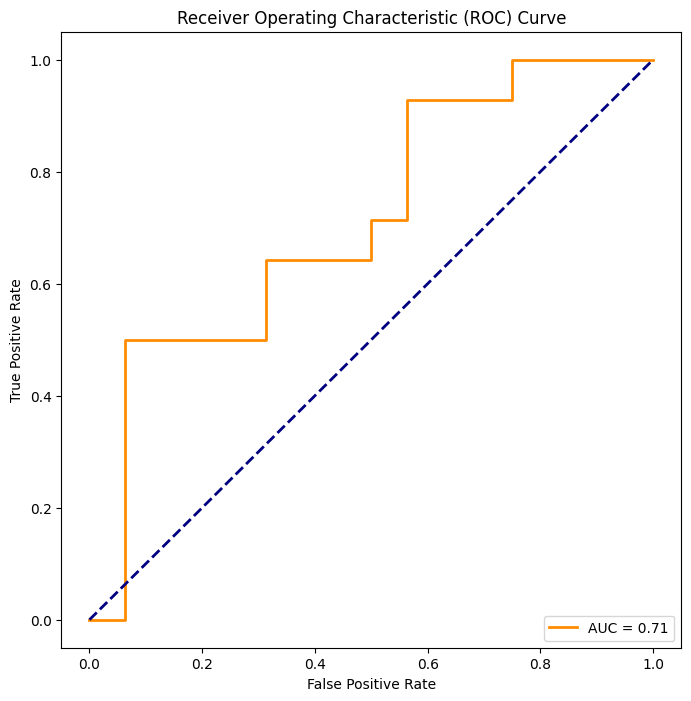

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_celeb_test_probs = model_celeb.predict(X_celeb_test_resized)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_celeb_test_encoded, y_celeb_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [68]:
# Get predicted probabilities for each class
y_celeb_test_probs = model_celeb.predict(X_celeb_test_resized)

# Convert probabilities to class labels
y_celeb_test_pred = np.argmax(y_celeb_test_probs, axis=1)


1/1 [==============================] - 0s 182ms/step


In [69]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_celeb_test_encoded, y_celeb_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.53      1.00      0.70        16
           1       0.00      0.00      0.00        14

    accuracy                           0.53        30
   macro avg       0.27      0.50      0.35        30
weighted avg       0.28      0.53      0.37        30



E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Conestoga\Foundation of ML\CNN_transfer-learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

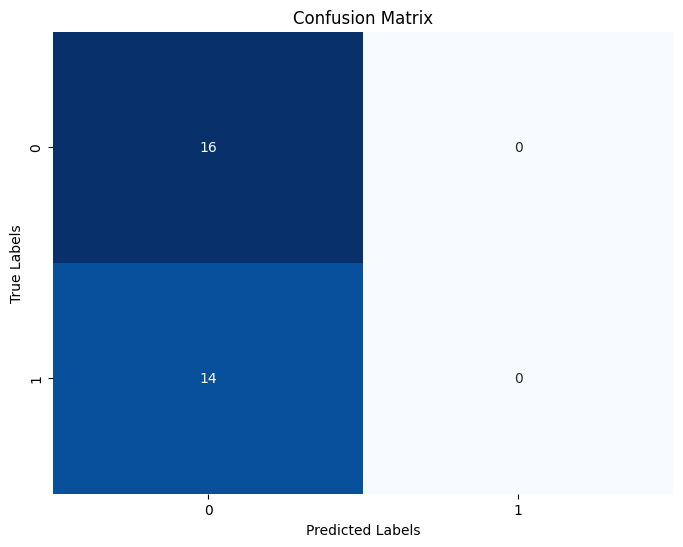

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_celeb_test_encoded, y_celeb_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder_celeb.classes_,
            yticklabels=label_encoder_celeb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
